# Project Title : Diamond Price Prediction Using Machine Learning

#### Problem Statement : Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price. Hence the more accurate below program is in predicting the prices , the more beneficial it would be as it will consume less time with no loss.

A classic Diamonds dataset is considered which contains the prices and other attributes of almost 54,000 diamonds. The dataset contains 53943 rows and 10 variables. Variable details are as follows:

1. Price : in US dollars
2. Carat : weight of the diamond
3. Cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color : diamond colour, from J (worst) to D (best)
5. clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x : length in mm
7. y : width in mm
8. z : depth in m
9. depth : The height of a diamond
10. table : The width of the diamond’s table expressed as a percentage of its average diameter. (A diamond's table is the facet             which can be seen when the stone is viewed face up)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Diamonds Prices2022.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
#all datatypes of columns are correct

Dropping unwanted Columns

In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


# Visualization

In [7]:
#Cut

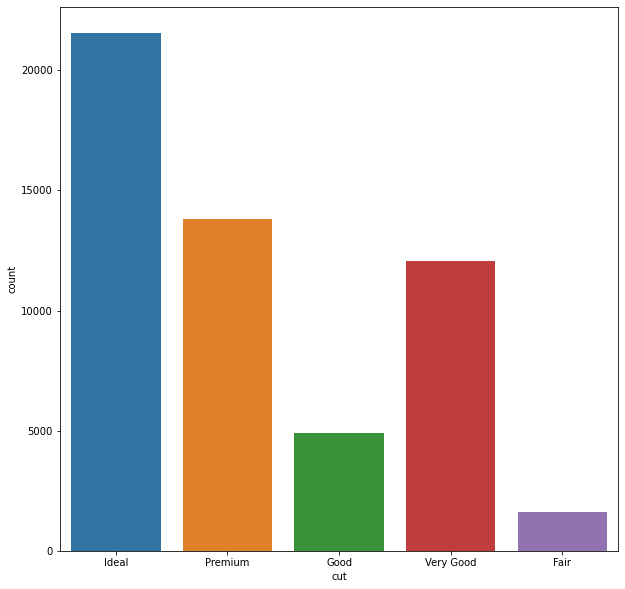

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['cut'])
plt.show()

In [9]:
#Ideal cut is most common

In [10]:
#clarity

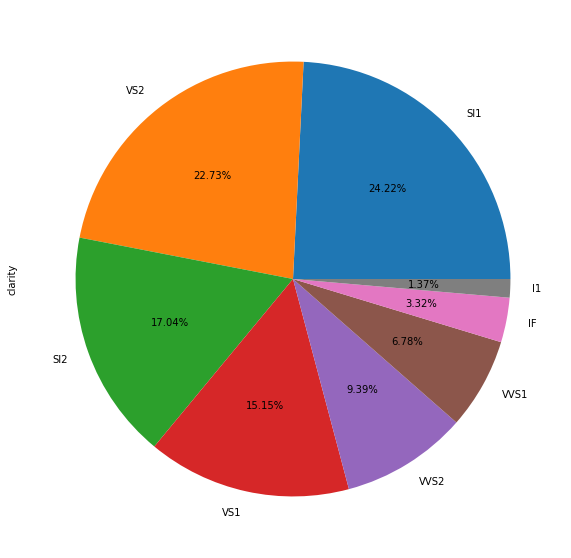

In [11]:
plt.figure(figsize=(10,10))
df['clarity'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

In [12]:
#count of diamonds with clarity SI1 is highest

In [13]:
#Color

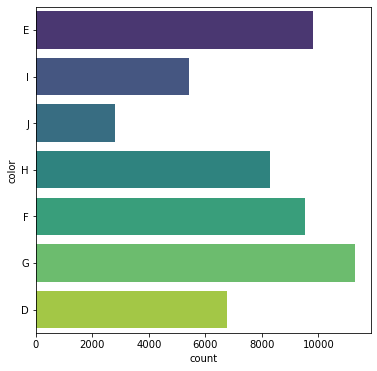

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,y=df['color'],palette='viridis')
plt.show()

In [15]:
#'G' color diamonds are maximum

In [16]:
#Carat

<Figure size 720x720 with 0 Axes>

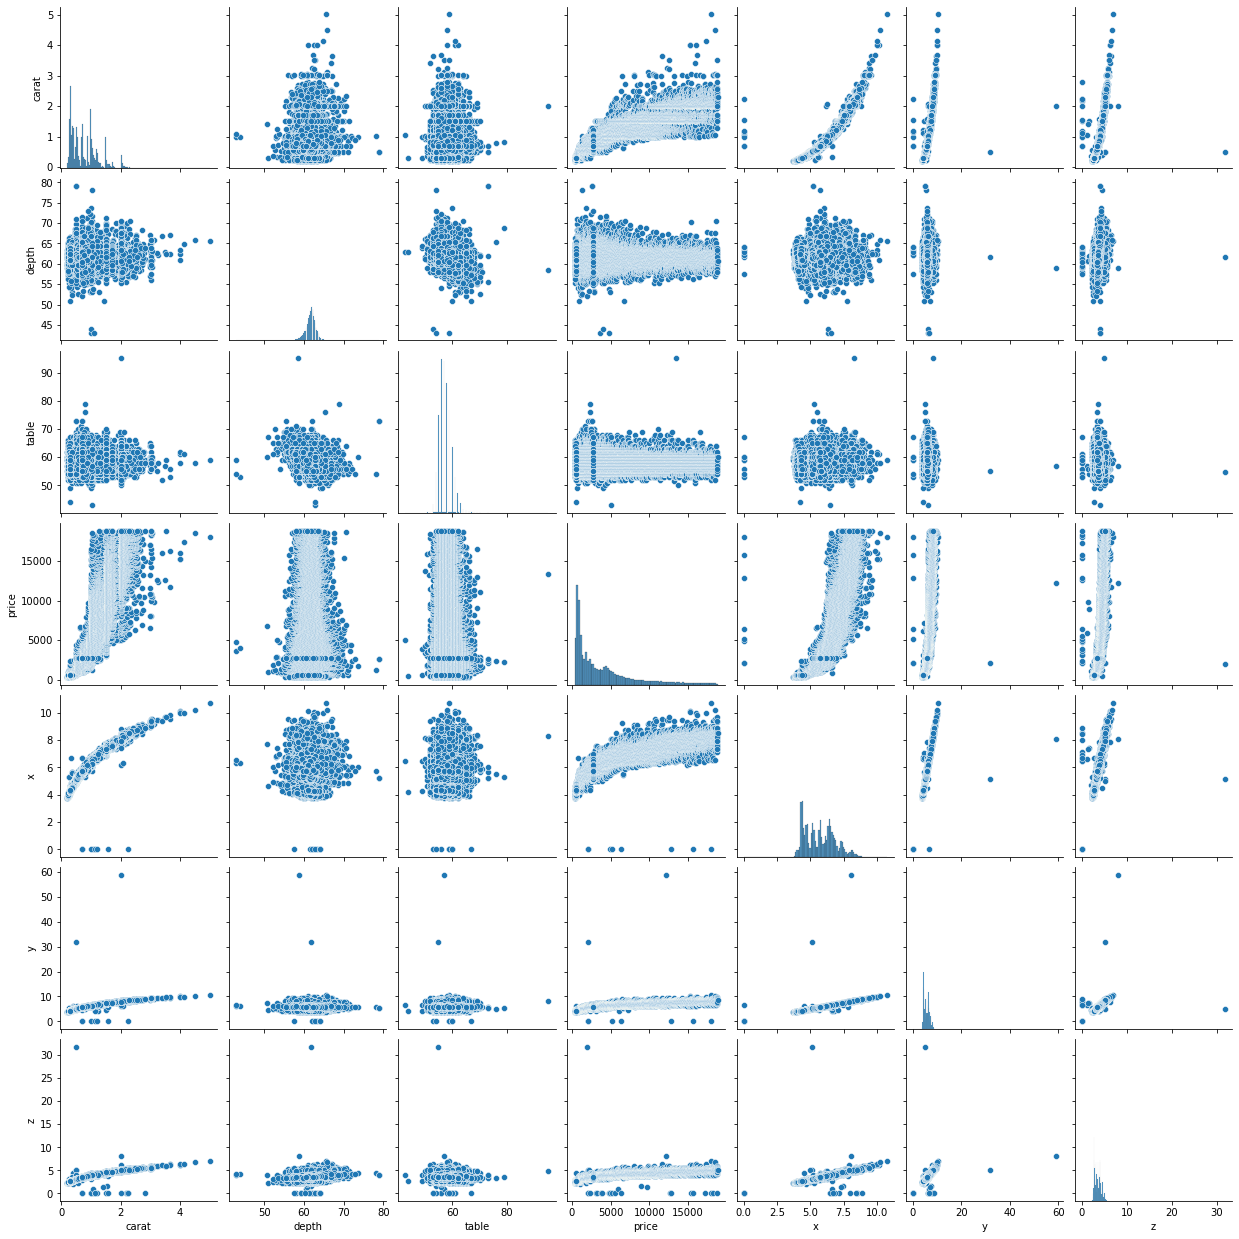

In [17]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [18]:
#from above plots:
# 1. As x,y,z increases accordingly carat & price also increase 
# 2. As carat increases , price also increases

# EDA

# 1. Checking for missing values

In [19]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [20]:
#no missing values are present

# 2. Handling Ouliers

Check if outliers are present

In [21]:
df_num=df.select_dtypes([int,float])

In [22]:
df_num

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43


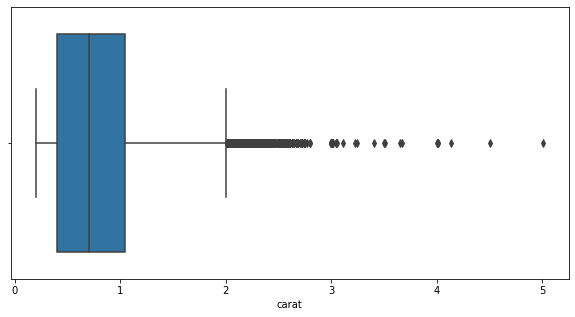

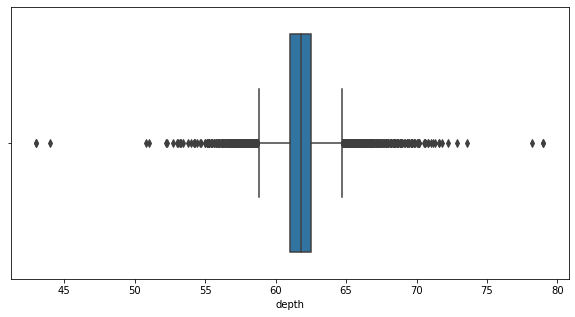

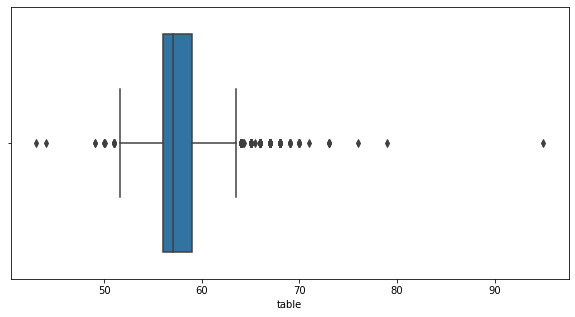

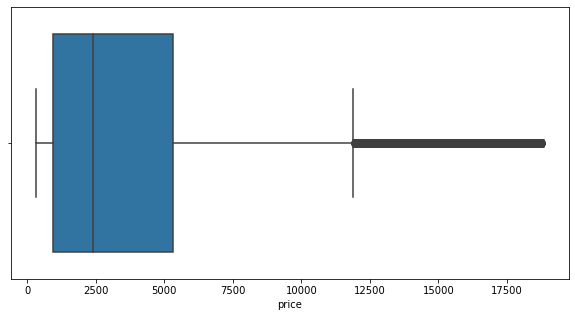

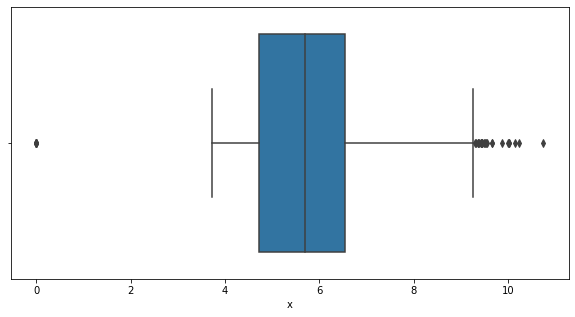

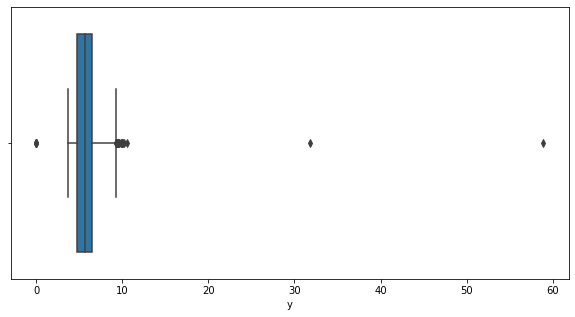

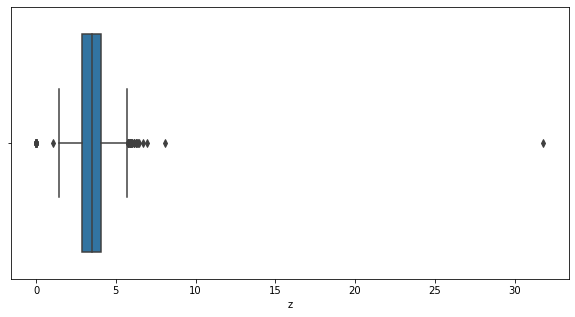

In [23]:
for i in df_num:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(df_num[i])

In [24]:
#Outliers are present

Removing Outliers

In [25]:
df1=df.copy()

In [26]:
def remove_outlier(df1,col_name):           
            q1 = df1[col_name].quantile(0.25)
            q3 = df1[col_name].quantile(0.75)
            iqr = q3-q1 
            lower  = q1-1.5*iqr
            upper = q3+1.5*iqr
            index = df1[(df[col_name] > upper)|(df1[col_name] < lower)].index
            df1.drop(index, inplace=True)

In [27]:
for i in df_num:
    remove_outlier(df1,i) 

In [28]:
df_num1=df1.select_dtypes([int,float])

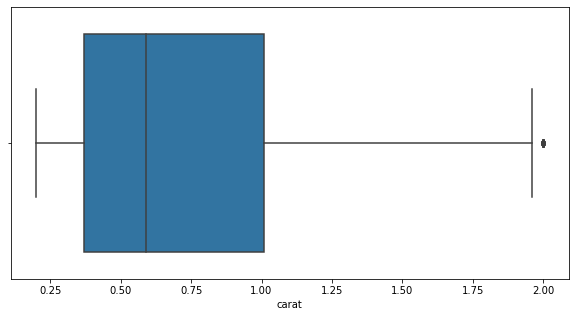

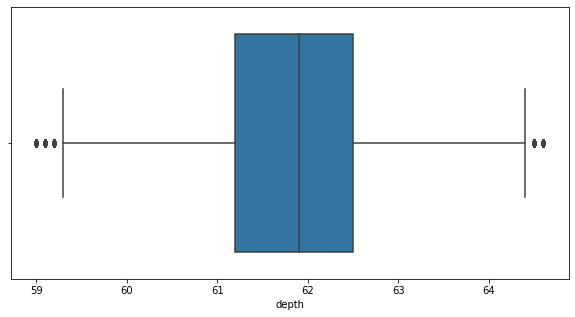

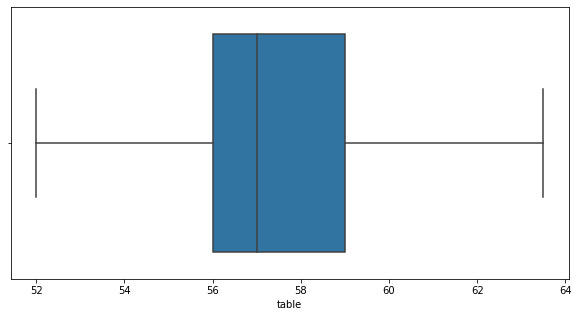

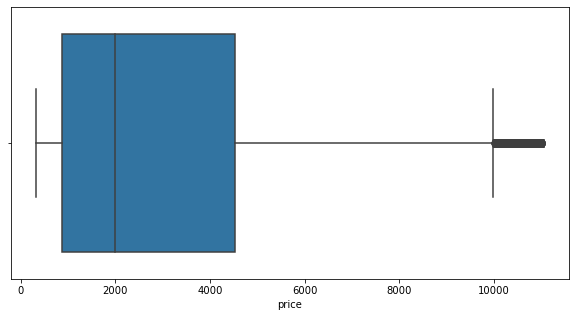

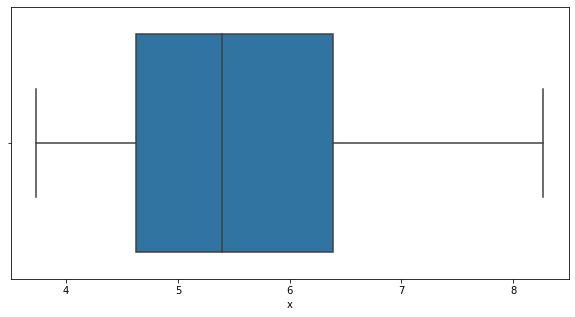

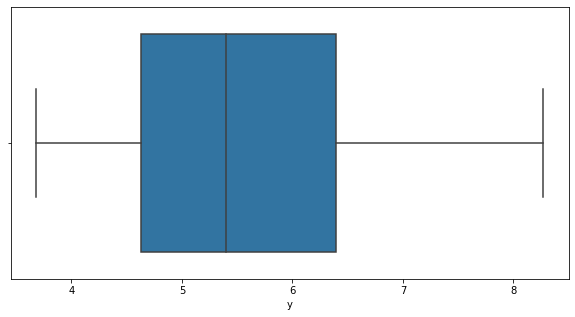

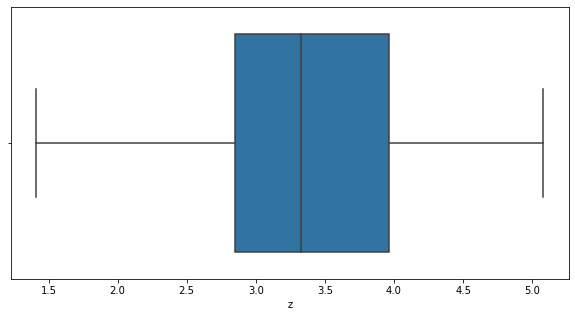

In [29]:
for i in df_num1:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(df_num1[i])

In [30]:
#Outliers are removed

In [31]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [32]:
df1.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.043719,0.189850,0.924790,0.986593,0.985718,0.985459
depth,0.043719,1.000000,-0.227784,0.014082,-0.002734,-0.004560,0.098615
table,0.189850,-0.227784,1.000000,0.140719,0.187535,0.182027,0.161770
price,0.924790,0.014082,0.140719,1.000000,0.904023,0.905072,0.900899
x,0.986593,-0.002734,0.187535,0.904023,1.000000,0.998496,0.993498
y,0.985718,-0.004560,0.182027,0.905072,0.998496,1.000000,0.993305
z,0.985459,0.098615,0.161770,0.900899,0.993498,0.993305,1.000000


# 3. Handling Skewness

Checking for skewness

In [33]:
df_num=df1.select_dtypes([int,float])

In [34]:
df_num.drop('price',inplace=True,axis=1)

carat
0.6857661047517649


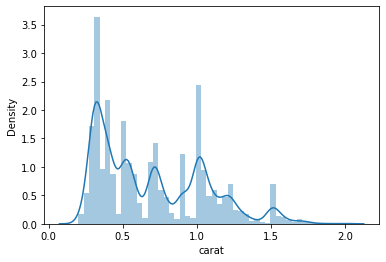

depth
-0.19772990769719642


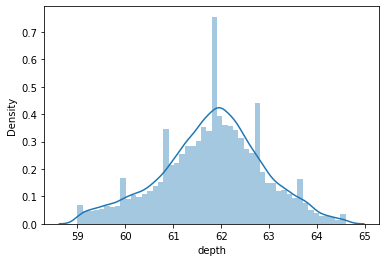

table
0.39728104161817723


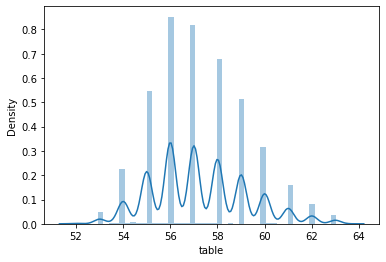

x
0.2550652997186015


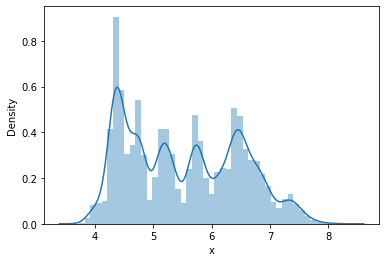

y
0.24850876030548555


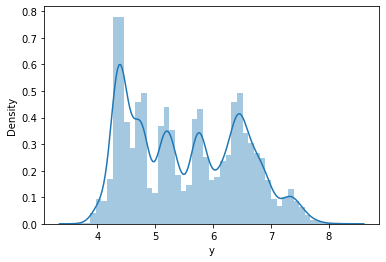

z
0.2504823542479902


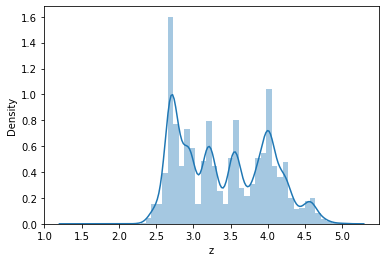

In [35]:
for i in df_num:
    print(i)
    print(skew(df_num[i]))
    
    plt.figure()
    sns.distplot(df_num[i])
    plt.show()

In [36]:
#since carat,x,y & z have good correlation with target we will not remove skewness from them

In [37]:
#depth also has negative value of skewness so also skewness cannot be removed from that

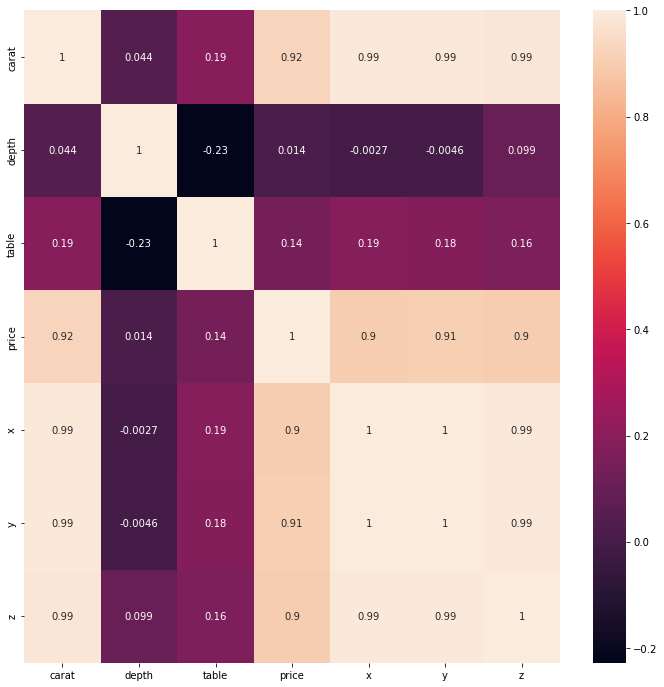

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [39]:
#'table' column correlation with target column 'price' is low , so we will remove skewness from that column

In [40]:
df1['table']=np.log(df1['table'])

In [41]:
skew(df1['table'])

0.30960137668874727

In [42]:
#df_num1=df1['table']

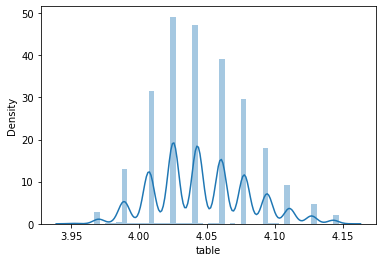

In [43]:
sns.distplot(df1['table'])
plt.show()

# 4. Encoding

In [44]:
oe=OrdinalEncoder()

In [45]:
cat_col=df1.select_dtypes(object).columns

In [46]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [47]:
df1[cat_col]=oe.fit_transform(df1[cat_col])

In [48]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,4.007333,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,4.110874,326,3.89,3.84,2.31
3,0.29,3.0,5.0,5.0,62.4,4.060443,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,4.060443,335,4.34,4.35,2.75
5,0.24,4.0,6.0,7.0,62.8,4.043051,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3.0,4.0,3.0,61.0,4.060443,2757,6.15,6.12,3.74
53939,0.75,2.0,0.0,3.0,62.2,4.007333,2757,5.83,5.87,3.64
53940,0.71,3.0,1.0,2.0,60.5,4.007333,2756,5.79,5.74,3.49
53941,0.71,3.0,2.0,2.0,59.8,4.127134,2756,5.74,5.73,3.43


In [49]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [50]:
df1=df1[['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y','z','price']]

In [51]:
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2.0,1.0,3.0,61.5,4.007333,3.95,3.98,2.43,326
1,0.21,3.0,1.0,2.0,59.8,4.110874,3.89,3.84,2.31,326
3,0.29,3.0,5.0,5.0,62.4,4.060443,4.20,4.23,2.63,334
4,0.31,1.0,6.0,3.0,63.3,4.060443,4.34,4.35,2.75,335
5,0.24,4.0,6.0,7.0,62.8,4.043051,3.94,3.96,2.48,336
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3.0,4.0,3.0,61.0,4.060443,6.15,6.12,3.74,2757
53939,0.75,2.0,0.0,3.0,62.2,4.007333,5.83,5.87,3.64,2757
53940,0.71,3.0,1.0,2.0,60.5,4.007333,5.79,5.74,3.49,2756
53941,0.71,3.0,2.0,2.0,59.8,4.127134,5.74,5.73,3.43,2756


# 5. Scaling

In [52]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [53]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2.0,1.0,3.0,61.5,4.007333,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,4.110874,3.89,3.84,2.31
3,0.29,3.0,5.0,5.0,62.4,4.060443,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,4.060443,4.34,4.35,2.75
5,0.24,4.0,6.0,7.0,62.8,4.043051,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53938,0.86,3.0,4.0,3.0,61.0,4.060443,6.15,6.12,3.74
53939,0.75,2.0,0.0,3.0,62.2,4.007333,5.83,5.87,3.64
53940,0.71,3.0,1.0,2.0,60.5,4.007333,5.79,5.74,3.49
53941,0.71,3.0,2.0,2.0,59.8,4.127134,5.74,5.73,3.43


In [54]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53938    2757
53939    2757
53940    2756
53941    2756
53942    2757
Name: price, Length: 46535, dtype: int64

In [55]:
sc=StandardScaler()
x.iloc[:,:]=sc.fit_transform(x.iloc[:,:]) 

In [56]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.292693,-0.661635,-0.910926,-0.512564,-0.282358,-1.122761,-1.629297,-1.613156,-1.647480
1,-1.347941,0.399000,-0.910926,-1.090757,-1.860276,1.836571,-1.691510,-1.759202,-1.848422
3,-1.126952,0.399000,1.462664,0.643821,0.553011,0.395189,-1.370078,-1.352362,-1.312578
4,-1.071704,-1.722270,2.056062,-0.512564,1.388380,0.395189,-1.224916,-1.227180,-1.111637
5,-1.265070,1.459635,2.056062,1.800207,0.924286,-0.101890,-1.639666,-1.634020,-1.563755
...,...,...,...,...,...,...,...,...,...
53938,0.447594,0.399000,0.869267,-0.512564,-0.746451,0.395189,0.651827,0.619247,0.546128
53939,0.143734,-0.661635,-1.504324,-0.512564,0.367374,-1.122761,0.320027,0.358452,0.378677
53940,0.033240,0.399000,-0.910926,-1.090757,-1.210545,-1.122761,0.278552,0.222839,0.127501
53941,0.033240,0.399000,-0.317529,-1.090757,-1.860276,2.301318,0.226709,0.212407,0.027030


# 6. Feature Engineering

In [57]:
x['size']=x['x']*x['y']*x['z']

In [58]:
x

,carat,cut,color,clarity,depth,table,x,y,z,size
0,-1.292693,-0.661635,-0.910926,-0.512564,-0.282358,-1.122761,-1.629297,-1.613156,-1.647480,-4.330091
1,-1.347941,0.399000,-0.910926,-1.090757,-1.860276,1.836571,-1.691510,-1.759202,-1.848422,-5.500360
3,-1.126952,0.399000,1.462664,0.643821,0.553011,0.395189,-1.370078,-1.352362,-1.312578,-2.432000
4,-1.071704,-1.722270,2.056062,-0.512564,1.388380,0.395189,-1.224916,-1.227180,-1.111637,-1.671005
5,-1.265070,1.459635,2.056062,1.800207,0.924286,-0.101890,-1.639666,-1.634020,-1.563755,-4.189686
...,...,...,...,...,...,...,...,...,...,...
53938,0.447594,0.399000,0.869267,-0.512564,-0.746451,0.395189,0.651827,0.619247,0.546128,0.220440
53939,0.143734,-0.661635,-1.504324,-0.512564,0.367374,-1.122761,0.320027,0.358452,0.378677,0.043440
53940,0.033240,0.399000,-0.910926,-1.090757,-1.210545,-1.122761,0.278552,0.222839,0.127501,0.007914
53941,0.033240,0.399000,-0.317529,-1.090757,-1.860276,2.301318,0.226709,0.212407,0.027030,0.001302


In [59]:
#new column 'size' is created from 3 existing columns

In [60]:
#dropping cols. to reduce size of dataframe

In [61]:
x.drop(['x','y','z'],inplace=True,axis=1)

In [62]:
x

,carat,cut,color,clarity,depth,table,size
0,-1.292693,-0.661635,-0.910926,-0.512564,-0.282358,-1.122761,-4.330091
1,-1.347941,0.399000,-0.910926,-1.090757,-1.860276,1.836571,-5.500360
3,-1.126952,0.399000,1.462664,0.643821,0.553011,0.395189,-2.432000
4,-1.071704,-1.722270,2.056062,-0.512564,1.388380,0.395189,-1.671005
5,-1.265070,1.459635,2.056062,1.800207,0.924286,-0.101890,-4.189686
...,...,...,...,...,...,...,...
53938,0.447594,0.399000,0.869267,-0.512564,-0.746451,0.395189,0.220440
53939,0.143734,-0.661635,-1.504324,-0.512564,0.367374,-1.122761,0.043440
53940,0.033240,0.399000,-0.910926,-1.090757,-1.210545,-1.122761,0.007914
53941,0.033240,0.399000,-0.317529,-1.090757,-1.860276,2.301318,0.001302


# Splitting the data

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Modelling

# Linear Regression

In [64]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [65]:
r2_score(ytest,ypred)

0.8847230438669235

# KNN

In [66]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [67]:
r2_score(ytest,ypred)

0.9539536676712246

Hypertunning in KNN

In [68]:
ac_list=[]
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=r2_score(ytest,ypred)
    ac_list.append(ac)
    print(i,f":",ac)

1 : 0.9413851051792554
2 : 0.9534618219504423
3 : 0.9556680775227925
4 : 0.9566352448813715
5 : 0.9562831642541979
6 : 0.9558525508032114
7 : 0.9556486440744753
8 : 0.9551482900378435
9 : 0.9544774453921653
10 : 0.9539536676712246
11 : 0.9534335866139403
12 : 0.9527196422914437
13 : 0.9519530002235524
14 : 0.9513101012012174
15 : 0.9508149687198966
16 : 0.9503793406818989
17 : 0.9500718622807415
18 : 0.9495140091622742
19 : 0.948920521117528
20 : 0.9486498538179344


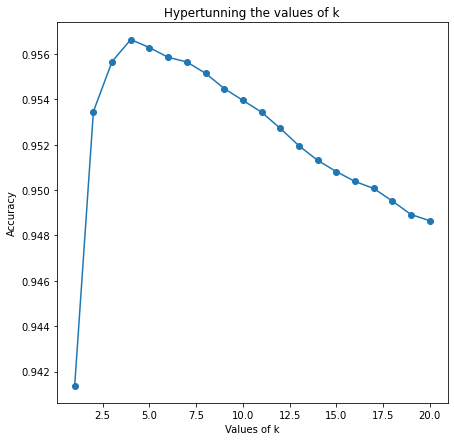

In [69]:
plt.figure(figsize=(7,7))
plt.title("Hypertunning the values of k")
plt.plot(range(1,21),ac_list,marker="o")
plt.xlabel("Values of k")
plt.ylabel("Accuracy")
plt.show()

In [70]:
#Accuracy when k=4 is highest 

In [71]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [72]:
r2_score(ytest,ypred)

0.9566352448813715

# SVR

In [73]:
svm=SVR()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

print(r2_score(ytest,ypred))

0.5746984124508058


Hypertunning in SVR

In [74]:
# svm=SVR()
# param_grid={'C':[1,10],'gamma':[1,10]}
# gs=GridSearchCV(svm,param_grid)
# gs.fit(xtrain,ytrain)
# ypred=gs.predict(xtest)

In [75]:
# svm=gs.best_estimator_
# svm.fit(xtrain,ytrain)
# ypred=svm.predict(xtest)
# print(r2_score(ytest,ypred))

# Decision Tree Regressor

In [76]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(r2_score(ytest,ypred))

0.96645454002395


In [77]:
dt.score(xtrain,ytrain)

0.9999960253337628

In [78]:
dt.score(xtest,ytest)

0.96645454002395

Hypertunning in DT

In [79]:
dt=DecisionTreeRegressor()
param_grid={'max_depth':[1,51],'min_samples_split':[2,51],'min_samples_leaf':[1,31]}
gs=GridSearchCV(dt,param_grid)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

In [80]:
dt=gs.best_estimator_
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(r2_score(ytest,ypred))

0.9761683203565085


In [81]:
dt.score(xtrain,ytrain)

0.9829717669463649

In [82]:
dt.score(xtest,ytest)

0.9761683203565085

# Random Forest Regressor

In [83]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(r2_score(ytest,ypred))

0.9812042793110385


# Gradient Boosting Regressor

In [84]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print(r2_score(ytest,ypred))

0.9733729433161613


# XGBOOST Regressor

In [85]:
xb=XGBRegressor()
xb.fit(xtrain,ytrain)
ypred=xb.predict(xtest)
print(r2_score(ytest,ypred))

0.9816340186588101


# PCA

In [86]:
pca=PCA(n_components=6)
xtrain=pca.fit_transform(xtrain)

<BarContainer object of 6 artists>

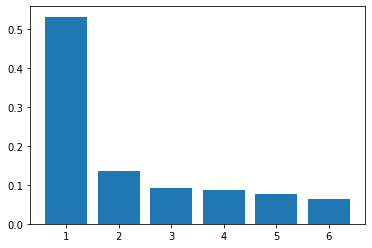

In [87]:
plt.bar(range(1,7),pca.explained_variance_ratio_)

In [88]:
xtest=pca.transform(xtest)

In [89]:
rf1=RandomForestRegressor()
rf1.fit(xtrain,ytrain)
ypred=rf1.predict(xtest)
print(r2_score(ytest,ypred))

0.9656609397362647


In [90]:
xb1=XGBRegressor()
xb1.fit(xtrain,ytrain)
ypred=xb1.predict(xtest)
print(r2_score(ytest,ypred))

0.9572979937099013


In [91]:
#accuracy decreased , so all variables are important

In [92]:
#accuracy received through RandomForestRegressor model is 98.12%

# Model Deployment

In [93]:
pickle.dump(rf,open("model.pkl",'wb'))